In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Read data

In [4]:
sdss = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.cols.csv')
sdss = clean_sdss(sdss)

Cleaning SDSS: 4151126 left


In [5]:
sdss_x_gaia = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.x.GAIA.DR2.cols.csv')
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1426995 left


In [6]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [7]:
kids_x_sdss_x_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.x.GAIA.DR2.cols.csv',
                                  sdss_cleaning=True, cut='r')

Data shape: (35267, 68)
Droping NANs: 35106 left
Removing limiting magnitudes: 34327 left
Removing errors bigger than 1: 34327 left
Removing SExtractor flags: 23282 left
Removing KiDS flags: 18338 left
Cleaning SDSS: 17434 left
Removing R > 22: 17431 left


In [8]:
describe_column(sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([2541424,  680843,  928859]),
 array([61.22252131, 16.40140531, 22.37607338]))

In [9]:
describe_column(sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([336129, 361138, 729728]),
 array([23.55502297, 25.30758692, 51.13739011]))

In [10]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17107,  6084, 10396]),
 array([50.93339685, 18.11415131, 30.95245184]))

In [11]:
describe_column(kids_x_sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([3617, 4566, 9248]),
 array([20.75038724, 26.19471057, 53.05490219]))

# Clean GAIA

In [12]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia)

Data shape: (1426995, 30)
Removing paralax_error > 1 shape: (867941, 30)
Removing pmra_error > 2 shape: (721039, 30)
Removing pmdec_error > 2 shape: (702355, 30)
Removing paralax_norm shape: (665298, 30)
Removing proper motions shape: (339307, 30)


In [13]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia)

Data shape: (17431, 81)
Removing paralax_error > 1 shape: (10577, 81)
Removing pmra_error > 2 shape: (8054, 81)
Removing pmdec_error > 2 shape: (7992, 81)
Removing paralax_norm shape: (7860, 81)
Removing proper motions shape: (4242, 81)


# SDSS x GAIA

Data shape: (1426995, 30)
5 position shape: (992384, 30)
Removing paralax_error shape: (867941, 30)
Removing pmra_error shape: (721039, 30)
Removing pmdec_error shape: (702355, 30)
Removing parallax_norm shape: (524319, 30)
Removing pmra_norm and pmdec_norm shape: (183040, 30)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  2165, 137578,  43297]), array([ 1.18280157, 75.16280594, 23.65439248]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0894158,-0.0235555,0.0254261
GALAXY,-0.301773,0.0880848,-0.0618506
STAR,0.485458,-0.415031,-1.51167


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.07702,1.09229,1.11507
GALAXY,1.36022,1.41475,1.56296
STAR,1.31526,2.07791,1.95296


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0891845,-0.0228383,0.0204906
GALAXY,-0.348204,0.0754883,-0.0315351
STAR,0.413152,-0.492357,-1.70755


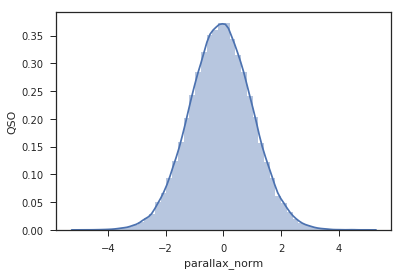

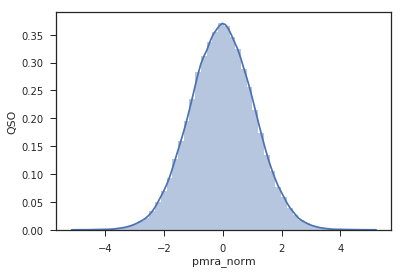

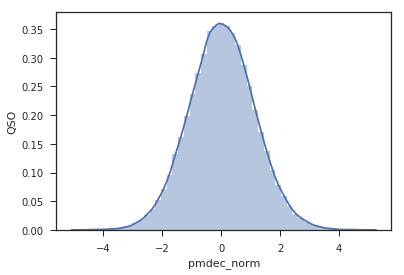

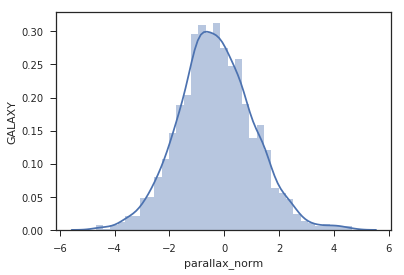

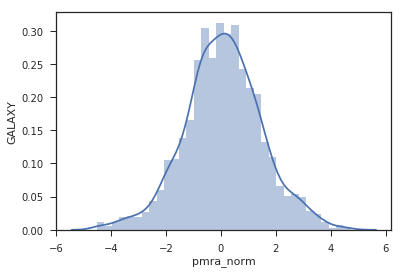

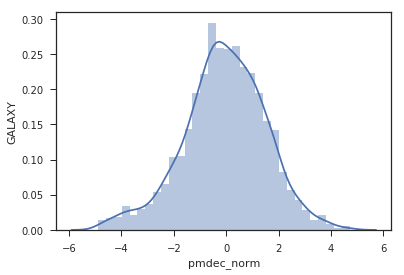

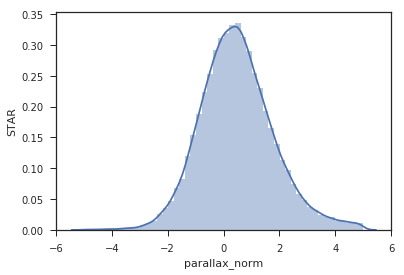

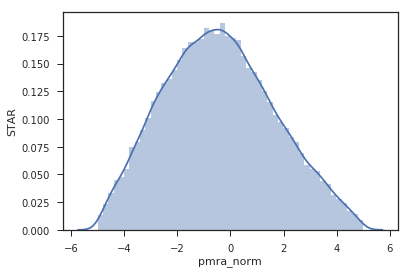

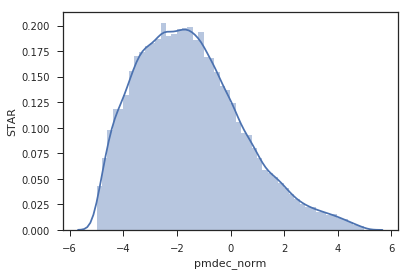

In [11]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, error_lim=1, parallax_lim=(-5, 5), pm_lim=25)
print(describe_column(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, norm=True)

Data shape: (1426995, 30)
5 position shape: (992384, 30)
Removing parallax_norm shape: (955157, 30)
Removing pmra_norm and pmdec_norm shape: (506522, 30)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 21262, 288106, 197154]), array([ 4.19764591, 56.87926684, 38.92308725]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0600853,-0.0149936,0.0170698
GALAXY,-0.153838,0.0587702,-0.128165
STAR,0.668937,-0.613569,-2.6873


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.0813,1.09445,1.12727
GALAXY,1.29088,1.58669,1.75655
STAR,1.85167,3.30339,3.21749


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0597641,-0.0139736,0.0173022
GALAXY,-0.165315,0.0979001,0.00192183
STAR,0.45025,-0.57806,-2.49462


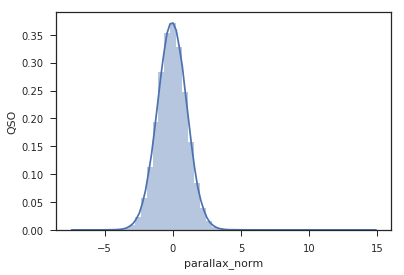

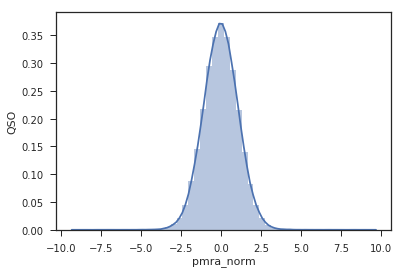

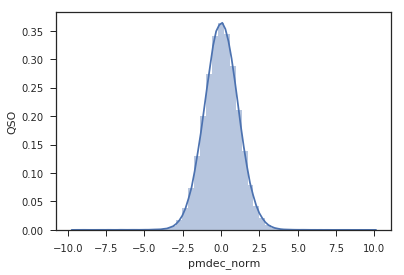

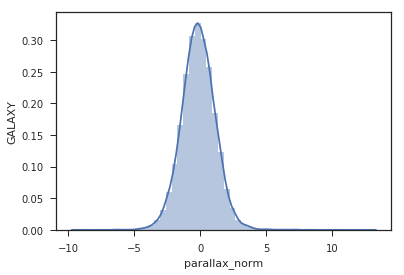

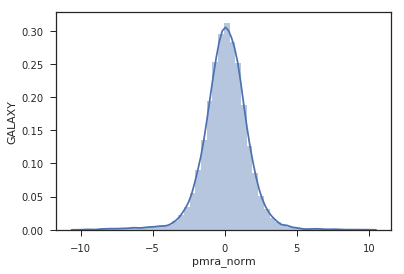

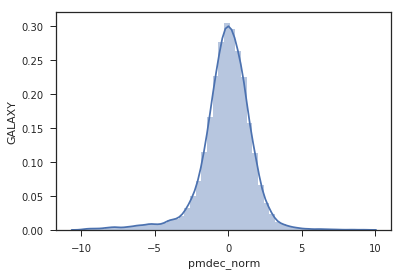

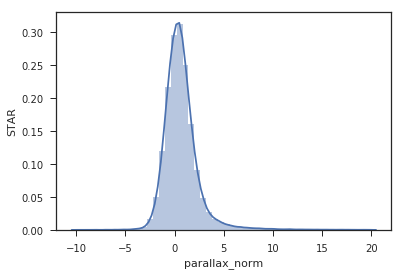

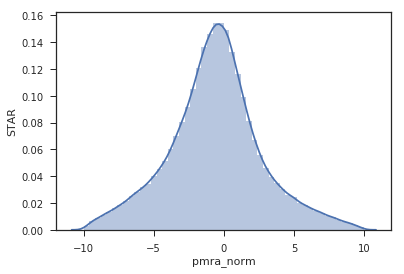

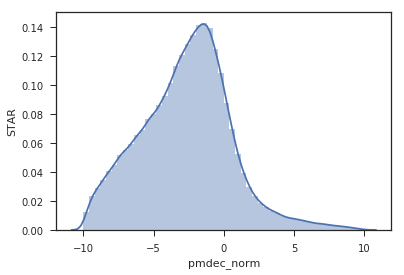

In [12]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, error_lim=None, parallax_lim=(-10, 20), pm_lim=100)
print(describe_column(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, norm=True)

# KiDS x SDSS x GAIA

Data shape: (17431, 81)
5 position shape: (12216, 81)
Removing paralax_error shape: (10577, 81)
Removing pmra_error shape: (8054, 81)
Removing pmdec_error shape: (7992, 81)
Removing parallax_norm shape: (7081, 81)
Removing pmra_norm and pmdec_norm shape: (2289, 81)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3617, 4566, 9248]), array([20.75038724, 26.19471057, 53.05490219]))
Mean:


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0370908,-0.0241393,0.00908552
GALAXY,0.119615,0.0790402,0.217589
STAR,0.260061,-1.53715,-1.40803


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.05436,1.07224,1.09944
GALAXY,1.1968,1.29706,1.08321
STAR,1.25499,1.46718,1.82911


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0127644,-0.00555295,-0.0231877
GALAXY,0.462075,0.0808448,-0.0225665
STAR,0.224637,-1.53092,-1.44559


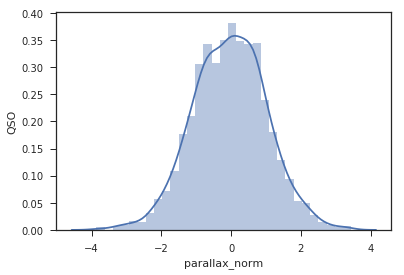

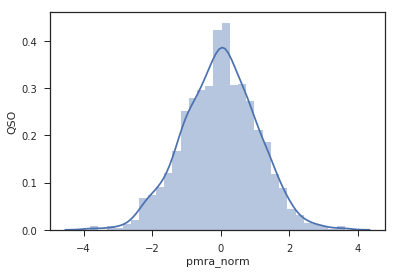

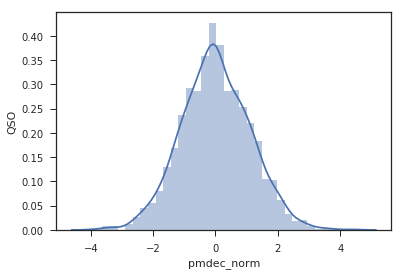

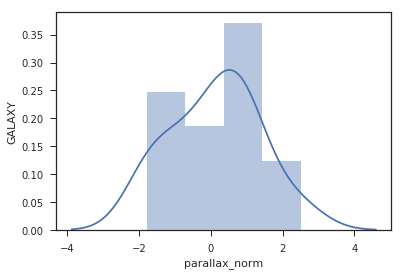

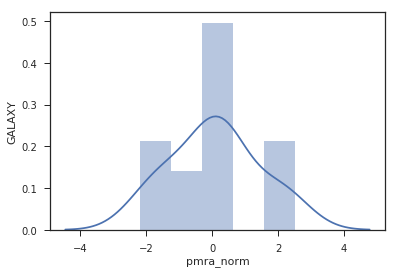

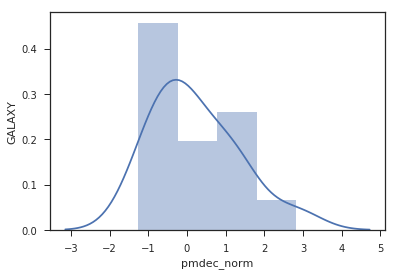

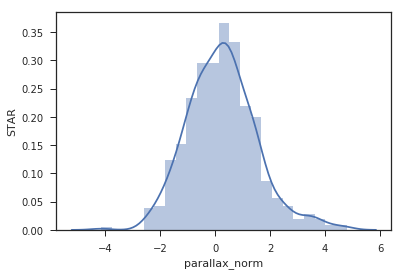

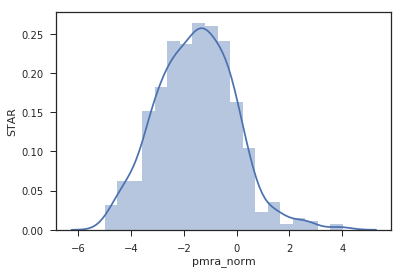

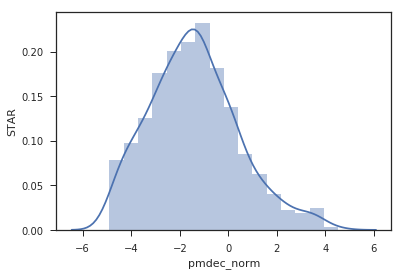

In [14]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, error_lim=1, parallax_lim=(-5, 5), pm_lim=25)
print(describe_column(kids_x_sdss_x_gaia['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean)

Data shape: (17431, 81)
5 position shape: (12216, 81)
Removing paralax_error shape: (10577, 81)
Removing pmra_error shape: (8054, 81)
Removing pmdec_error shape: (7992, 81)
Removing parallax_norm shape: (7860, 81)
Removing pmra_norm and pmdec_norm shape: (2984, 81)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3617, 4566, 9248]), array([20.75038724, 26.19471057, 53.05490219]))
Mean:


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0388879,-0.0269327,0.0153488
GALAXY,0.538804,-0.99422,0.095269
STAR,0.546303,-2.67812,-3.05294


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.0552,1.07516,1.11417
GALAXY,1.22219,2.90008,3.4047
STAR,1.61514,3.00415,3.55749


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0130023,-0.0107921,-0.0214966
GALAXY,0.649675,-0.210162,-0.0225665
STAR,0.372441,-2.44595,-2.9208


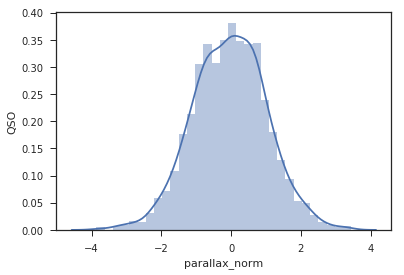

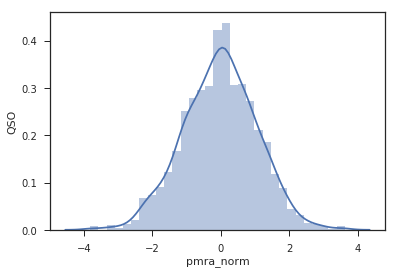

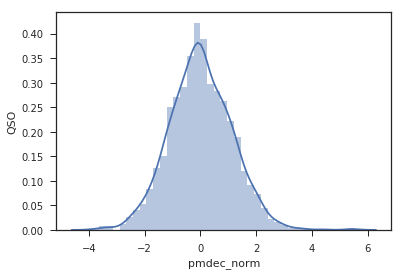

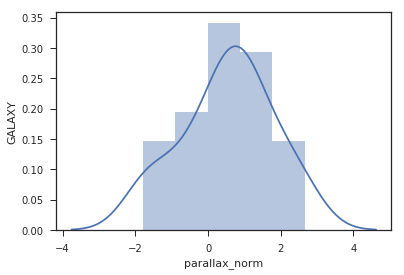

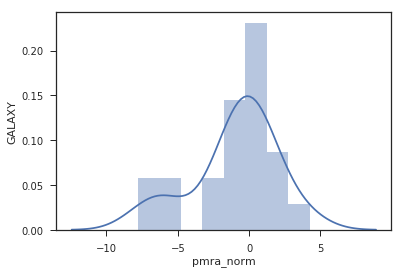

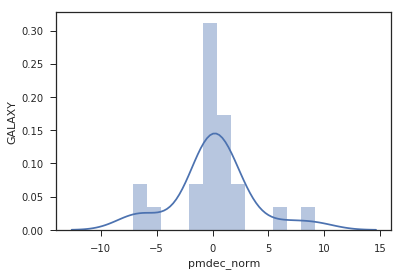

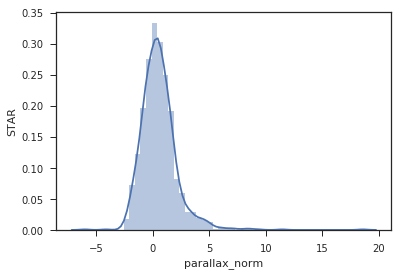

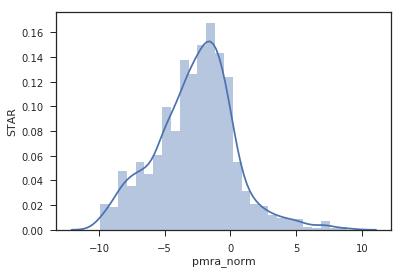

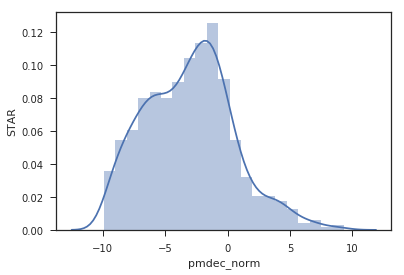

In [15]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, error_lim=1, parallax_lim=(-10, 20), pm_lim=100)
print(describe_column(kids_x_sdss_x_gaia['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean)